Question 1: Autoencoder

In [90]:
import keras
from keras import layers
from matplotlib import pyplot
import numpy as np

In [91]:
# This is the size of our encoded representations
encoding_dim = 32
# This is our input image. 3072 -- (32,32,3)
input_img = keras.Input(shape=(3072,))
# "encoded" is the encoded representation of the input

# Pick an activation function and other parameters in the dense layer function...

encoded = layers.Dense(encoding_dim, activation='relu',use_bias=True,kernel_initializer="glorot_uniform")(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(3072, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [92]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [93]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [94]:
#First, we'll configure our model to use a per-pixel binary crossentropy loss, and the "adadelta" optimizer:
#There are different types of optimizers such as "sgd", "adadelta", "adam", "RMSprop()"...etc. We will use "adadelta"
#For more information about the optimization, use this.
#https://ruder.io/optimizing-gradient-descent/index.html#gradientdescentoptimizationalgorithms
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [95]:
from keras.datasets import cifar10

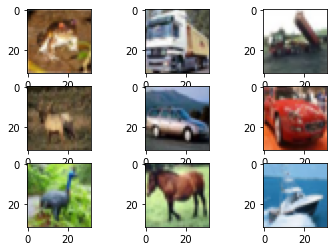

In [103]:
#(trainX, trainy), (testX, testy) = cifar10.load_data()
(x_train, _), (x_test, _) = cifar10.load_data()
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_train[i])
# show the figure
pyplot.show()

In [104]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [105]:
# epochs = 10, and batch size = 256 per iteration
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
196/196 [==============================] - 6s 32ms/step - loss: 0.6935 - val_loss: 0.6935
Epoch 2/10
196/196 [==============================] - 8s 42ms/step - loss: 0.6935 - val_loss: 0.6935
Epoch 3/10
196/196 [==============================] - 6s 32ms/step - loss: 0.6935 - val_loss: 0.6935
Epoch 4/10
196/196 [==============================] - 6s 33ms/step - loss: 0.6935 - val_loss: 0.6935
Epoch 5/10
196/196 [==============================] - 6s 32ms/step - loss: 0.6935 - val_loss: 0.6935
Epoch 6/10
196/196 [==============================] - 6s 32ms/step - loss: 0.6935 - val_loss: 0.6935
Epoch 7/10
196/196 [==============================] - 6s 32ms/step - loss: 0.6934 - val_loss: 0.6934
Epoch 8/10
196/196 [==============================] - 6s 32ms/step - loss: 0.6934 - val_loss: 0.6934
Epoch 9/10
196/196 [==============================] - 6s 32ms/step - loss: 0.6934 - val_loss: 0.6934
Epoch 10/10
196/196 [==============================] - 6s 32ms/step - loss: 0.6934 - val_lo

In [106]:
# Encode and decode some images
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(testX)
decoded_imgs = decoder.predict(encoded_imgs)

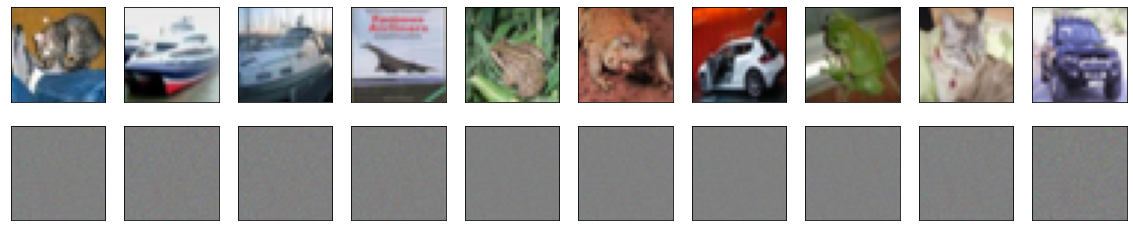

In [107]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()